In [38]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
import numpy as np
import pandas as pd

# Tratamento de Base de Dados

In [39]:
train_data = pd.read_csv("titanic_train.csv")
test_data = pd.read_csv("titanic_test.csv")

dropped_test = test_data.dropna()

In [40]:
train_data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)
test_data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

In [41]:
le = LabelEncoder()
train_data["Sex"] = le.fit_transform(train_data["Sex"])
test_data["Sex"] = le.fit_transform(test_data["Sex"])

In [42]:
enc = OneHotEncoder(handle_unknown='ignore')

one_hot_encond_temp = pd.DataFrame(enc.fit_transform(train_data[['Embarked']]).toarray())
train_data = train_data.iloc[: , :-1]
pd.concat([train_data, one_hot_encond_temp], axis=1, ignore_index=False)

one_hot_encond_temp = pd.DataFrame(enc.fit_transform(test_data[['Embarked']]).toarray())
test_data = test_data.iloc[: , :-1]
pd.concat([test_data, one_hot_encond_temp], axis=1, ignore_index=False)

,Pclass,Sex,Age,SibSp,Parch,Fare,0,1,2
0,3,1,34.5,0,0,7.8292,0.0,1.0,0.0
1,3,0,47.0,1,0,7.0000,0.0,0.0,1.0
2,2,1,62.0,0,0,9.6875,0.0,1.0,0.0
3,3,1,27.0,0,0,8.6625,0.0,0.0,1.0
4,3,0,22.0,1,1,12.2875,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...
413,3,1,NaN,0,0,8.0500,0.0,0.0,1.0
414,1,0,39.0,0,0,108.9000,1.0,0.0,0.0
415,3,1,38.5,0,0,7.2500,0.0,0.0,1.0
416,3,1,NaN,0,0,8.0500,0.0,0.0,1.0


In [43]:
train_data.dropna(inplace=True)
test_data.dropna(inplace=True)

In [44]:
XTrain = train_data.iloc[: , 1 : ]
yTrain = train_data.iloc[: , 0]

XTest = test_data

XTrain

,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,1,22.0,1,0,7.2500
1,1,0,38.0,1,0,71.2833
2,3,0,26.0,0,0,7.9250
3,1,0,35.0,1,0,53.1000
4,3,1,35.0,0,0,8.0500
...,...,...,...,...,...,...
885,3,0,39.0,0,5,29.1250
886,2,1,27.0,0,0,13.0000
887,1,0,19.0,0,0,30.0000
889,1,1,26.0,0,0,30.0000


In [45]:
sc = StandardScaler()
sc.fit(XTrain)

XTrain = sc.transform(XTrain.values)
XTest = sc.transform(XTest.values)

XTrain

array([[ 0.91123237,  0.75905134, -0.53037664,  0.52457013, -0.50589515,
        -0.51897787],
       [-1.47636364, -1.31743394,  0.57183099,  0.52457013, -0.50589515,
         0.69189675],
       [ 0.91123237, -1.31743394, -0.25482473, -0.55170307, -0.50589515,
        -0.50621356],
       ...,
       [-1.47636364, -1.31743394, -0.73704057, -0.55170307, -0.50589515,
        -0.08877362],
       [-1.47636364,  0.75905134, -0.25482473, -0.55170307, -0.50589515,
        -0.08877362],
       [ 0.91123237,  0.75905134,  0.15850313, -0.55170307, -0.50589515,
        -0.50952283]])

# Rede Neural

In [46]:
ppn = Perceptron(max_iter=1000, eta0=0.1, random_state=0) 
#usa SGD (comentar que atualiza os w para cada amostra e "sorteia" as amostras, permitindo melhor convergência na busca pelo minimo global; fora que permite online learning)
#o batch gd (igual do vídeo passado) é bom para bases pequenas, mas ruim para bases grandes principalmente devido ao estouro de memória, fora que converge mais rápido
#minibatch tem características hibridas

ppn.fit(XTrain, yTrain)

Perceptron(eta0=0.1)

In [47]:
yPred = ppn.predict(XTest)

In [48]:
y_test = pd.read_csv("test_y.csv")
y_test.drop(dropped_test['PassengerId'].index, inplace=True)
y_test = y_test["Survived"].values

In [56]:
y_test

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1,

In [49]:
confusion_matrix(y_test, yPred)

array([[151,  72],
       [ 68,  40]], dtype=int64)

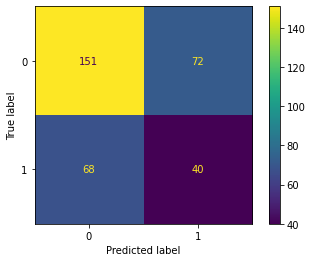

In [50]:
plot_confusion_matrix(ppn, XTest, y_test) 

In [51]:
accuracy_score(y_test, yPred)

0.5770392749244713

In [52]:
ppn.score(XTest, y_test)

0.5770392749244713

# Links Extras

* https://www.youtube.com/playlist?list=PLeo1K3hjS3uu7CxAacxVndI4bE_o3BDtO
* https://www.youtube.com/watch?v=aircAruvnKk
* https://www.youtube.com/watch?v=c6NBkkKNZXw&list=PLxt59R_fWVzT9bDxA76AHm3ig0Gg9S3So&index=5
* https://machinelearningmastery.com/implement-perceptron-algorithm-scratch-python/
* https://scikit-learn.org/0.15/modules/generated/sklearn.linear_model.Perceptron.html
* https://chrisalbon.com/machine_learning/basics/perceptron_in_scikit-learn/